In [ ]:
#Script de Python para generar graficas y tablas requeridas en el examen de programacion de la MCD 2021
#Carlos Alejandro Velazquez Valdez

In [175]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
#Leemos el archivo csv
covid_data = pd.read_csv('/content/200511COVID19MEXICO.csv', engine='python')

In [177]:
#Confirmamos que lo hemos leido correctamente leyendo las primeras 5 entradas
covid_data.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-11,07f569,2,3,27,2,27,27,4,1,2020-04-03,2020-03-29,9999-99-99,97,2,45,1,97,2,2,2,2,2,2,2,1,2,2,2,1,1,99,México,99,97
1,2020-05-11,0b0e89,2,3,25,2,25,25,6,2,2020-03-25,2020-03-22,2020-03-29,2,1,43,1,97,2,2,2,2,2,2,2,2,2,2,1,2,1,99,México,99,2
2,2020-05-11,0ecd46,2,3,27,1,27,27,4,1,2020-03-27,2020-03-18,2020-04-05,97,1,62,1,2,2,2,2,2,2,1,2,2,2,2,2,2,1,99,México,99,97
3,2020-05-11,12eb62,2,3,25,1,25,25,6,2,2020-04-05,2020-04-04,2020-04-20,1,1,62,1,2,2,2,2,2,2,1,2,2,2,2,2,2,1,99,México,99,2
4,2020-05-11,032c9a,2,3,25,2,25,25,6,2,2020-04-07,2020-04-02,2020-04-23,2,1,70,1,97,2,2,2,2,2,1,2,2,2,2,2,2,1,99,México,99,2


In [178]:
#Observamos los tipos de datos que tenemos para ver cuales necesitamos cambiar
covid_data.dtypes

FECHA_ACTUALIZACION    object
ID_REGISTRO            object
ORIGEN                  int64
SECTOR                  int64
ENTIDAD_UM              int64
SEXO                    int64
ENTIDAD_NAC             int64
ENTIDAD_RES             int64
MUNICIPIO_RES           int64
TIPO_PACIENTE           int64
FECHA_INGRESO          object
FECHA_SINTOMAS         object
FECHA_DEF              object
INTUBADO                int64
NEUMONIA                int64
EDAD                    int64
NACIONALIDAD            int64
EMBARAZO                int64
HABLA_LENGUA_INDIG      int64
DIABETES                int64
EPOC                    int64
ASMA                    int64
INMUSUPR                int64
HIPERTENSION            int64
OTRA_COM                int64
CARDIOVASCULAR          int64
OBESIDAD                int64
RENAL_CRONICA           int64
TABAQUISMO              int64
OTRO_CASO               int64
RESULTADO               int64
MIGRANTE                int64
PAIS_NACIONALIDAD      object
PAIS_ORIGE

In [179]:
#Hacemos un cast a datetime para la columna de las fechas
covid_data[['FECHA_ACTUALIZACION','FECHA_INGRESO','FECHA_SINTOMAS','FECHA_DEF']] = covid_data[['FECHA_ACTUALIZACION','FECHA_INGRESO','FECHA_SINTOMAS','FECHA_DEF']].apply(pd.to_datetime, format='%Y-%m-%d', errors ='coerce')
covid_data.dtypes

FECHA_ACTUALIZACION    datetime64[ns]
ID_REGISTRO                    object
ORIGEN                          int64
SECTOR                          int64
ENTIDAD_UM                      int64
SEXO                            int64
ENTIDAD_NAC                     int64
ENTIDAD_RES                     int64
MUNICIPIO_RES                   int64
TIPO_PACIENTE                   int64
FECHA_INGRESO          datetime64[ns]
FECHA_SINTOMAS         datetime64[ns]
FECHA_DEF              datetime64[ns]
INTUBADO                        int64
NEUMONIA                        int64
EDAD                            int64
NACIONALIDAD                    int64
EMBARAZO                        int64
HABLA_LENGUA_INDIG              int64
DIABETES                        int64
EPOC                            int64
ASMA                            int64
INMUSUPR                        int64
HIPERTENSION                    int64
OTRA_COM                        int64
CARDIOVASCULAR                  int64
OBESIDAD    

Generar una tabla con las siguientes columnas
* Fecha
* Confirmados Sonora
* Decesos por fecha

In [164]:
#Primero filtramos todos los casos confirmados en sonora
confirmados_sonora = covid_data[(covid_data['ENTIDAD_UM'] == 26) & (covid_data['RESULTADO'] == 1)].copy()

#Despues crearemos una funcion para poder contar los decesos por fecha
def conteo_muerte(value):
  '''Funcion que regresa 0 para casos donde no hubo defuncion y 1 para donde hubo defuncion'''
  if pd.isna(value) == True:
    return 0
  else:
    return 1


#Le aplicamos la funcion a la columna FECHA_DEF
confirmados_sonora['FECHA_DEF'] = confirmados_sonora['FECHA_DEF'].apply(conteo_muerte)
confirmados_sonora.head()

#Obtenemos las defunciones por fecha
defunciones_sonora = confirmados_sonora.groupby(['FECHA_SINTOMAS'])['FECHA_DEF'].sum().reset_index()

#Obtenemos confirmados en sonora
confirmados_sonora = confirmados_sonora.groupby('FECHA_SINTOMAS')['RESULTADO'].count()

#Unimos la serie al DF
tabla1 = defunciones_sonora.assign(CONFIRMADOS=test_confirmados.values)

#Reordenamos la tabla y cambiamos de nombre de columna
orden_columnas = ["FECHA_SINTOMAS", "CONFIRMADOS", "FECHA_DEF"]
tabla1 = tabla1.reindex(columns=orden_columnas)
tabla1 = tabla1.rename(columns={'FECHA_DEF':'DECESOS','FECHA_SINTOMAS':'FECHA'})
tabla1 = tabla1.set_index('FECHA')
tabla1.to_csv('tabla1.csv')
tabla1

,CONFIRMADOS,DECESOS
FECHA,,
2020-03-11,2,0
2020-03-12,2,0
2020-03-16,2,0
2020-03-17,4,0
2020-03-18,1,0
2020-03-19,2,0
2020-03-20,1,0
2020-03-22,2,1
2020-03-23,4,0


Generar una tabla con la cantidad de casos hospitalizados en los estados de:
* Sonora 
* Chihuahua 
* Nuevo León 
* Puebla

In [180]:
#Primero hacemos una lista con las claves de las entidades que queremos para que sea mas facil filtrarlo
lista_entidades = [8,26,19,21]

#Despues un diccionario con sus nombres para poder mapear
dict_estados = {
    8:'Chihuahua',
    19:'Nuevo Leon',
    21:'Puebla',
    26:'Sonora'
}

datos_estados = covid_data[covid_data['ENTIDAD_UM'].isin(lista_entidades)].copy()
filtro_estados = datos_estados[datos_estados['TIPO_PACIENTE'] == 2]
hospitalizado_estados = filtro_estados.groupby('ENTIDAD_UM')['TIPO_PACIENTE'].count()

#Por ultimo cambiamos los indices para que tengan el nombre del estado y ordenamos
hospitalizado_estados = hospitalizado_estados.rename(index=dict_estados)
hospitalizado_estados = hospitalizado_estados.sort_values(ascending=False)
hospitalizado_estados

ENTIDAD_UM
Puebla        1301
Nuevo Leon    1089
Chihuahua     1013
Sonora         549
Name: TIPO_PACIENTE, dtype: int64

Guardar la tabla como tabla2.csv, realizar un commit en el repositorio de GitHub

In [181]:
#Cambiamos los nombres de columnas
hospitalizado_estados =hospitalizado_estados.reset_index()
hospitalizado_estados.columns = ['ESTADO', 'HOSPITALIZADOS']
hospitalizado_estados = hospitalizado_estados.set_index('ESTADO')
hospitalizado_estados

#Guardamos como tabla2.csv
hospitalizado_estados.to_csv('tabla2.csv')
hospitalizado_estados

,HOSPITALIZADOS
ESTADO,
Puebla,1301
Nuevo Leon,1089
Chihuahua,1013
Sonora,549


Realizar dos grágicas y guardarlas en el repositorio como grafica1.png y grafica2.png, las cuales contengan lo siguiente:
*  En grafica1 realizar una gráfica de barras verticales con el número de casos hospitalizados (de acuerdo a nuestro archivo) de los estados de Sonora, Chihuahua,Nuevo León y Puebla. 
* En grafica2 graficar la serie de tiempo de confirmados a nivel Nacional en el tiempo

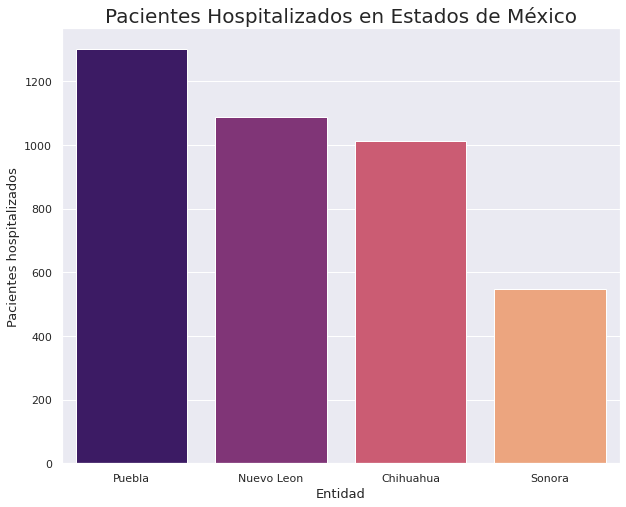

In [182]:
#Generamos la grafica 1 (Hospitalizados en Sonora, Chihuahua, Nuevo Leon y Puebla)
sns.set(rc={'figure.figsize':(10,8)})  
sns.set_theme(style="darkgrid") 
ax = sns.barplot(x=hospitalizado_estados.index, y=hospitalizado_estados['HOSPITALIZADOS'], palette=("magma"))
ax.set_xlabel('Entidad', fontsize=13)
ax.set_ylabel('Pacientes hospitalizados', fontsize=13)
ax.set_title('Pacientes Hospitalizados en Estados de México', fontsize= 20)

#Guaradamos la imagen como grafica1.png
plt.savefig('grafica1.png')
plt.show()

En grafica2 graficar la serie de tiempo de confirmados a nivel Nacional en el tiempo.

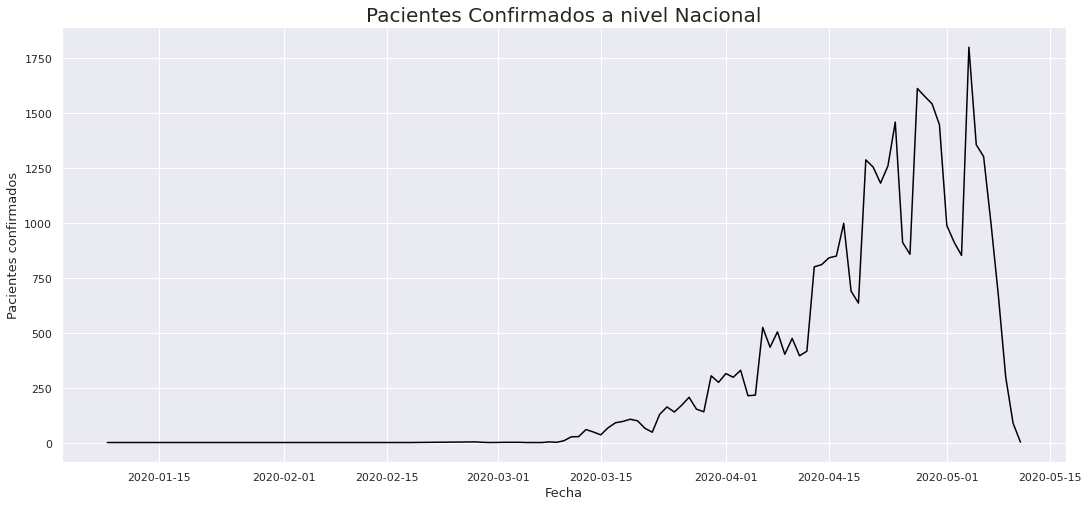

In [183]:
#Primero filtramos los datos para obtener solo los pacientes confirmados
confirmados_nacionales = covid_data[covid_data['RESULTADO'] == 1]
confirmados_nacionales

#Ahora agrupamos por fecha de actualizacion para obtener el conteo de cada dia que se actualizo
agrupados_confirmados = confirmados_nacionales.groupby('FECHA_INGRESO')['RESULTADO'].count()
agrupados_confirmados

#Generamos la grafica
sns.set(rc={'figure.figsize':(18,8)})
ax = sns.lineplot(x=agrupados_confirmados.index, y=agrupados_confirmados, color='black')
ax.set_xlabel('Fecha', fontsize=13)
ax.set_ylabel('Pacientes confirmados', fontsize=13)
ax.set_title('Pacientes Confirmados a nivel Nacional', fontsize= 20)

#Guardamos la figura
plt.savefig('grafica2.png')
plt.show()
